In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt #visualisation 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

Year    Country of origin  \
0  2018          Afghanistan   
1  2018              Albania   
2  2018              Algeria   
3  2018               Angola   
4  2018  Antigua and Barbuda   

                                   Country of asylum Authority  \
0  United Kingdom of Great Britain and Northern I...         G   
1  United Kingdom of Great Britain and Northern I...         G   
2  United Kingdom of Great Britain and Northern I...         G   
3  United Kingdom of Great Britain and Northern I...         G   
4  United Kingdom of Great Britain and Northern I...         G   

  Application type Stage of procedure Cases / Persons  applied  
0                A                 AR               C      726  
1                A                 AR               C      486  
2                A                 AR               C       79  
3                A                 AR               C       30  
4                A                 AR               C        5

In [5]:
df.tail()

Year     Country of origin Country of asylum Authority  \
38836  2023              Viet Nam          Thailand         U   
38837  2024                 Sudan             Egypt         U   
38838  2024           South Sudan             Egypt         U   
38839  2024  Central African Rep.          Cameroon         U   
38840  2024                 Sudan            Jordan         U   

      Application type Stage of procedure Cases / Persons  applied  
38836                R                 RA               P       25  
38837                R                 RA               P     2271  
38838                R                 RA               P        8  
38839                R                 RA               P        5  
38840                R                 RA               P        5

In [6]:
df.shape

(38841, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [8]:
df.describe()

Year        applied
count  38841.000000   38841.000000
mean    2020.983497     416.512036
std        1.992884    3391.981853
min     2018.000000       5.000000
25%     2019.000000       6.000000
50%     2021.000000      19.000000
75%     2023.000000      93.000000
max     2024.000000  258636.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [11]:
df = df.drop_duplicates()
df.head(10)

Year    Country of origin  \
0  2018          Afghanistan   
1  2018              Albania   
2  2018              Algeria   
3  2018               Angola   
4  2018  Antigua and Barbuda   
5  2018                Egypt   
6  2018              Armenia   
7  2018           Azerbaijan   
8  2018              Bahrain   
9  2018             Barbados   

                                   Country of asylum Authority  \
0  United Kingdom of Great Britain and Northern I...         G   
1  United Kingdom of Great Britain and Northern I...         G   
2  United Kingdom of Great Britain and Northern I...         G   
3  United Kingdom of Great Britain and Northern I...         G   
4  United Kingdom of Great Britain and Northern I...         G   
5  United Kingdom of Great Britain and Northern I...         G   
6  United Kingdom of Great Britain and Northern I...         G   
7  United Kingdom of Great Britain and Northern I...         G   
8  United Kingdom of Great Britain and Northern I...         G   
9  United Kingdom of Great Britain and Northern I...         G   

  Application type Stage of procedure Cases / Persons  applied  
0                A                 AR               C      726  
1                A                 AR               C      486  
2                A                 AR               C       79  
3                A                 AR               C       30  
4                A                 AR               C        5  
5                A                 AR               C      209  
6                A                 AR               C       19  
7                A                 AR               C       25  
8                A                 AR               C        7  
9                A                 AR               C        6

In [12]:
df.tail()

Year     Country of origin Country of asylum Authority  \
38836  2023              Viet Nam          Thailand         U   
38837  2024                 Sudan             Egypt         U   
38838  2024           South Sudan             Egypt         U   
38839  2024  Central African Rep.          Cameroon         U   
38840  2024                 Sudan            Jordan         U   

      Application type Stage of procedure Cases / Persons  applied  
38836                R                 RA               P       25  
38837                R                 RA               P     2271  
38838                R                 RA               P        8  
38839                R                 RA               P        5  
38840                R                 RA               P        5

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


# Dealing with missing data in dataset

In [14]:
df.isnull().sum()

Year                    0
Country of origin       0
Country of asylum       0
Authority               0
Application type        0
Stage of procedure    356
Cases / Persons         0
applied                 0
dtype: int64

In [15]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a","na"," ","--","nan","UnKnown","Na","unknown"]
df= pd.read_csv("data.csv", na_values = missing_value_formats)

In [16]:
df = df.dropna(axis = 1, how ='all')

In [17]:
df.isnull().sum()

Year                    0
Country of origin       0
Country of asylum       0
Authority               0
Application type        0
Stage of procedure    356
Cases / Persons         0
applied                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [19]:
df = df[df['Stage of procedure'] != ' ']

In [20]:
df = df[df['Stage of procedure'] != 'nan']

In [21]:
df.isnull().sum()

Year                    0
Country of origin       0
Country of asylum       0
Authority               0
Application type        0
Stage of procedure    356
Cases / Persons         0
applied                 0
dtype: int64

# Some visuals of initial dataset

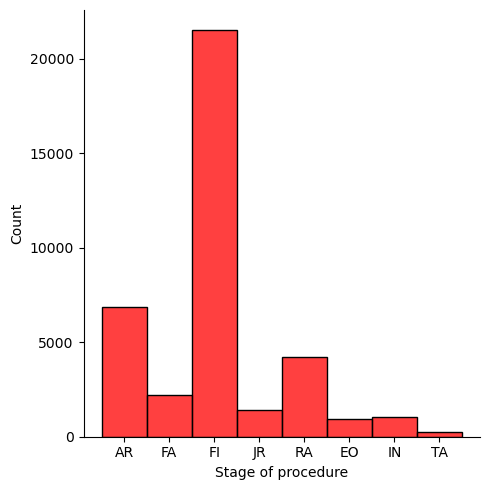

In [22]:
sns.displot(df["Stage of procedure"],color="red")

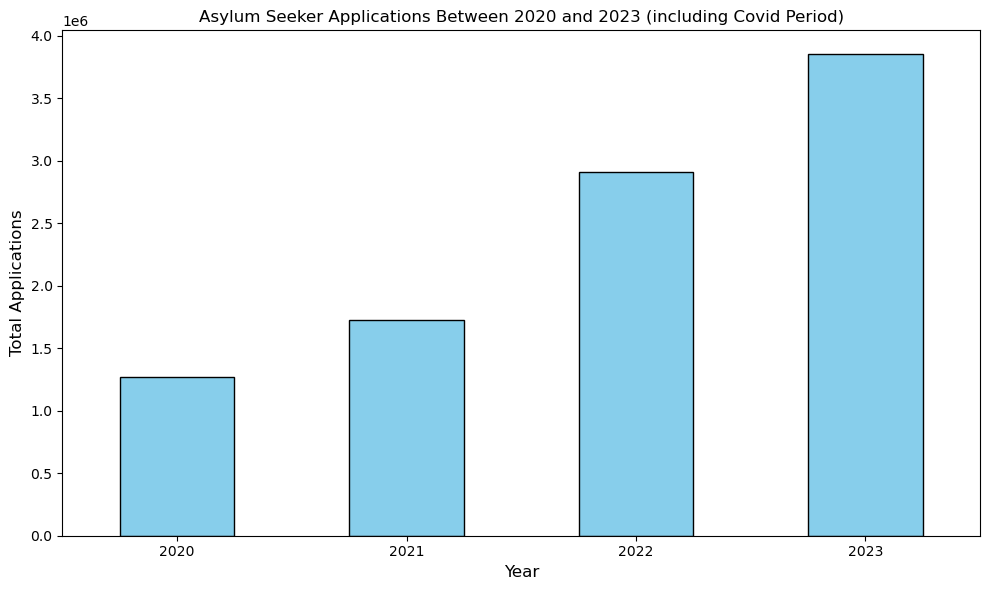

In [23]:
# Filter the data for the relevant years (2020 and 2021)
filtered_data = df[(df['Year'] >= 2020) & (df['Year'] <= 2023)]

# Summarize data by year to prepare for visualization
summary_by_year = filtered_data.groupby('Year')['applied'].sum()

# Generate the bar chart
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
summary_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Asylum Seeker Applications Between 2020 and 2023 (including Covid Period)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Applications', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='applied'>

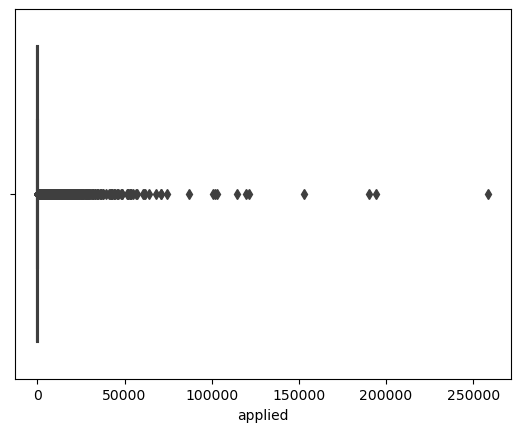

In [24]:
sns.boxplot(x=df["applied"])

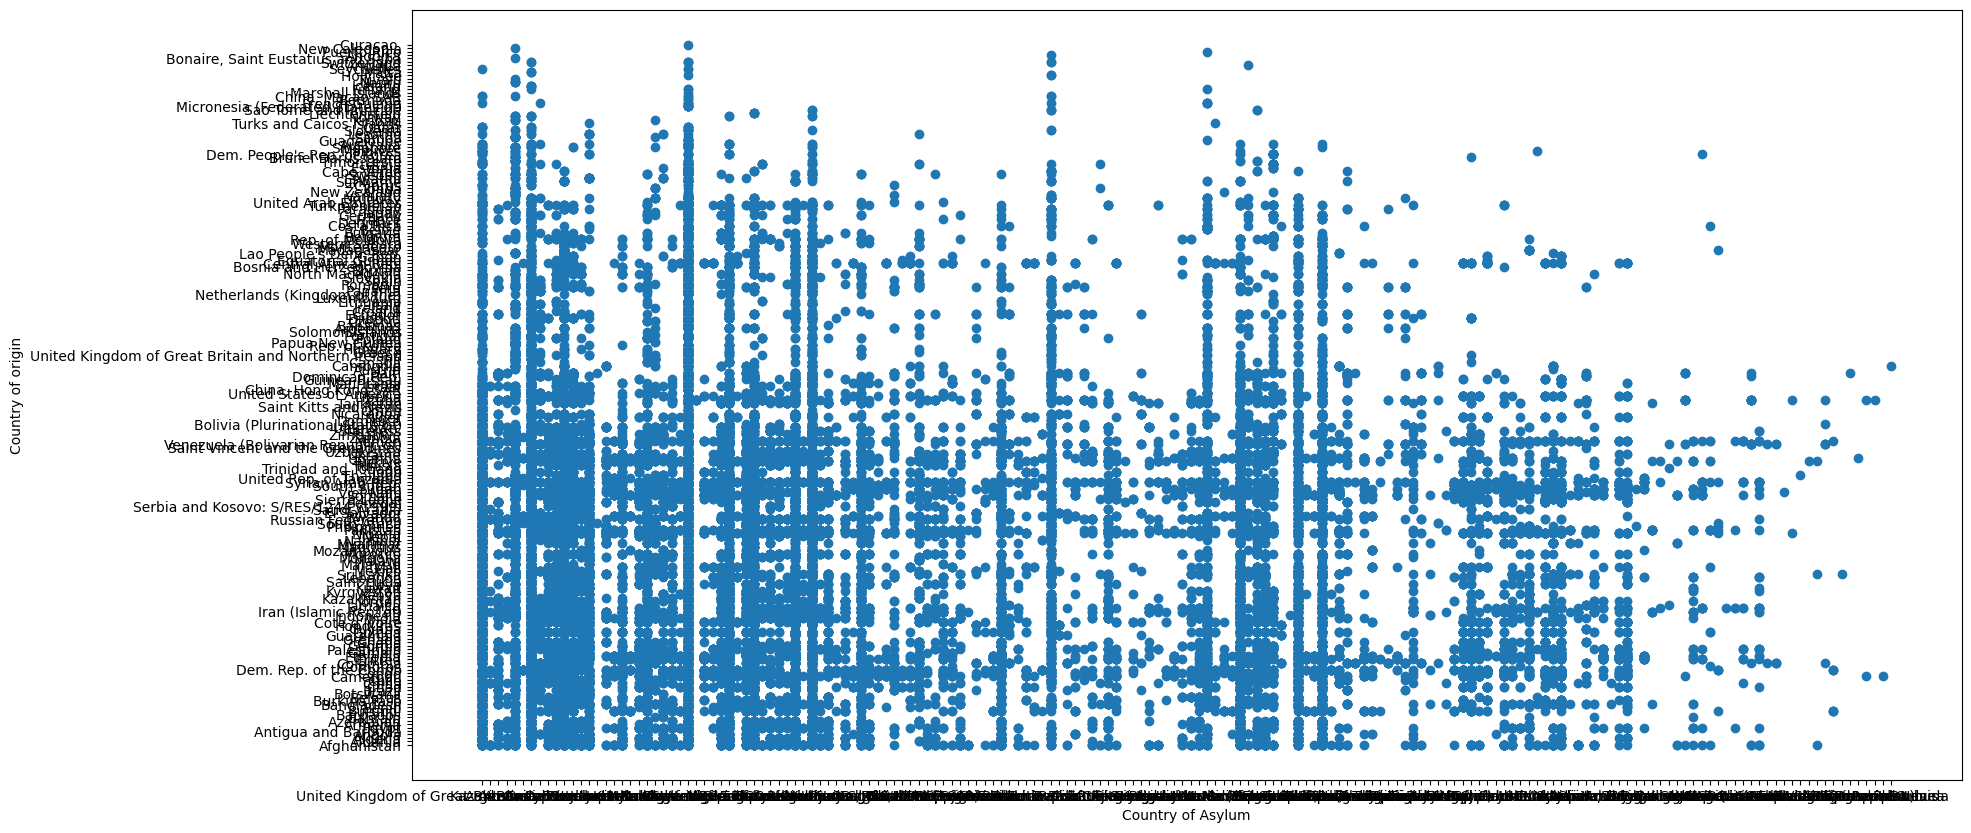

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df["Country of asylum"], df["Country of origin"])
ax.set_xlabel("Country of Asylum")
ax.set_ylabel("Country of origin")
plt.show()

# Data Preperation

In [26]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()

In [27]:
df = df.apply(le.fit_transform)

In [28]:
df.isnull().sum()

Year                  0
Country of origin     0
Country of asylum     0
Authority             0
Application type      0
Stage of procedure    0
Cases / Persons       0
applied               0
dtype: int64

# Modelling and Evaluation

In [29]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [30]:
# Putting feature variable to X
X = df.drop('applied',axis=1)

# Putting response variable to y
y = df['applied']

In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

Year  Country of origin  Country of asylum  Authority  \
4737      5                 26                149          0   
11501     0                174                 58          0   
26086     5                 22                149          0   
19047     3                163                 63          0   
1372      1                200                 28          0   

       Application type  Stage of procedure  Cases / Persons  
4737                  0                   0                1  
11501                 2                   3                1  
26086                 2                   3                1  
19047                 2                   3                1  
1372                  0                   0                1

In [32]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=20,random_state=42,  min_samples_split=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [33]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.30      0.60      0.40      2453
           1       0.06      0.08      0.06       522
           2       0.04      0.05      0.05       395
           3       0.04      0.05      0.04       372
           4       0.04      0.05      0.04       302
           5       0.02      0.03      0.03       288
           6       0.02      0.02      0.02       228
           7       0.03      0.03      0.03       191
           8       0.02      0.02      0.02       209
           9       0.02      0.02      0.02       189
          10       0.02      0.02      0.02       171
          11       0.02      0.02      0.02       129
          12       0.01      0.01      0.01       137
          13       0.01      0.01      0.01       135
          14       0.05      0.04      0.04       125
          15       0.01      0.01      0.01       115
          16       0.05      0.04      0.04        98
          17       0.00    

In [34]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[1466  179  131 ...    0    0    0]
 [ 286   40   21 ...    0    0    0]
 [ 197   27   21 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
0.13850510598129237


[Text(0.6153459775148437, 0.9761904761904762, 'x[2] <= 163.5\ngini = 0.946\nsamples = 27188\nvalue = [5785, 1192, 909 ... 1, 1, 1]'),
 Text(0.2537789343637168, 0.9285714285714286, 'x[1] <= 1.5\ngini = 0.942\nsamples = 25029\nvalue = [5577, 1134, 865 ... 0, 1, 1]'),
 Text(0.006387413062287336, 0.8809523809523809, 'x[2] <= 7.0\ngini = 0.983\nsamples = 696\nvalue = [75, 17, 13 ... 0, 0, 0]'),
 Text(0.00046588630710227036, 0.8333333333333334, 'x[0] <= 5.5\ngini = 0.6\nsamples = 10\nvalue = [6, 1, 0 ... 0, 0, 0]'),
 Text(0.00033277593364447884, 0.7857142857142857, 'x[0] <= 0.5\ngini = 0.519\nsamples = 9\nvalue = [6, 0, 0 ... 0, 0, 0]'),
 Text(0.0001996655601866873, 0.7380952380952381, 'gini = 0.667\nsamples = 3\nvalue = [1, 0, 0 ... 0, 0, 0]'),
 Text(0.00046588630710227036, 0.7380952380952381, 'x[0] <= 3.5\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 0 ... 0, 0, 0]'),
 Text(0.00033277593364447884, 0.6904761904761905, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0 ... 0, 0, 0]'),
 Text(0.000598996

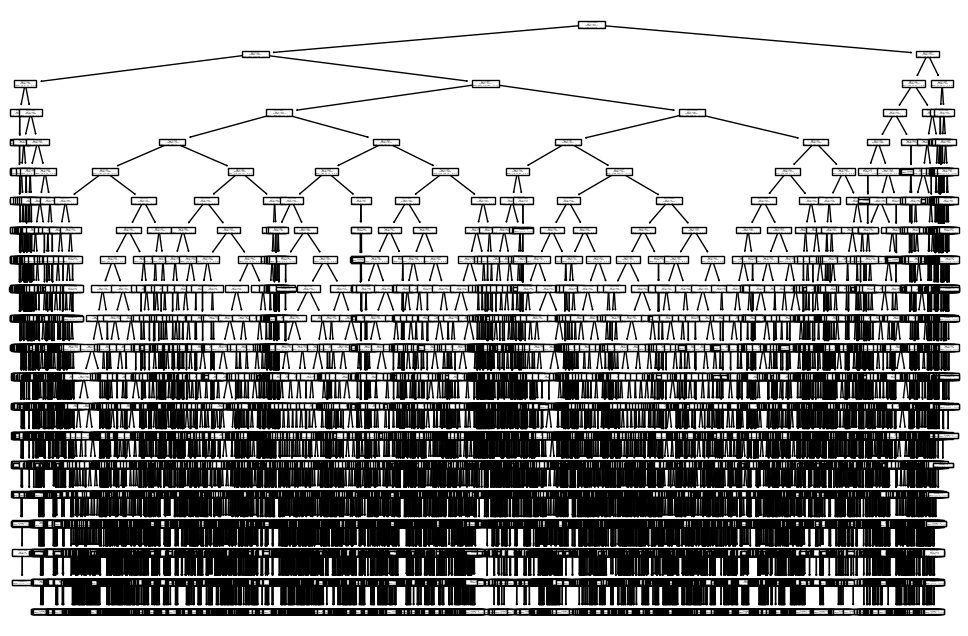

In [35]:
import matplotlib.pyplot as plt     
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default) 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

# Create the parameter grid 
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [37]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.329322      0.126150         0.058638        0.003477   
1        1.639840      0.074952         0.055644        0.002394   
2        1.259099      0.083300         0.057041        0.001596   
3        1.664971      0.115255         0.054846        0.001260   
4        1.336285      0.077442         0.054051        0.003958   
5        1.030861      0.045769         0.055447        0.002572   
6        1.008795      0.019104         0.056044        0.004651   
7        1.013387      0.031336         0.053651        0.003421   
8        0.863400      0.023963         0.051856        0.002185   
9        0.282016      0.023895         0.049068        0.003295   
10       0.281817      0.024938         0.057041        0.014607   
11       0.276856      0.021605         0.051857        0.003397   
12       0.268254      0.026692         0.048466        0.004305   
13       0.274436      0.028981         0.055248        0.003253   
14       0.262071      0.023048         0.049064        0.002705   
15       0.247113      0.019062         0.049263        0.001954   
16       0.260874      0.017542         0.050661        0.003960   
17       0.256486      0.027451         0.049863        0.001670   
18       1.665767      0.082969         0.055447        0.003191   
19       1.256789      0.058271         0.052855        0.004678   
20       0.985659      0.038604         0.053452        0.003816   
21       1.181515      0.061131         0.055646        0.003241   
22       1.107122      0.024422         0.054050        0.003804   
23       0.927621      0.021871         0.052454        0.001736   
24       0.841061      0.026852         0.054649        0.002474   
25       0.858010      0.018945         0.054847        0.001261   
26       0.837273      0.018897         0.058636        0.006567   
27       2.375883      0.048476         0.062228        0.002240   
28       1.758310      0.065872         0.059435        0.002999   
29       1.146412      0.030059         0.054450        0.001352   
30       1.466123      0.016536         0.055645        0.001321   
31       1.295597      0.038564         0.055048        0.000747   
32       1.098687      0.048316         0.058042        0.004612   
33       1.055476      0.047915         0.059036        0.002705   
34       1.047287      0.009532         0.057641        0.002221   
35       0.906080      0.030760         0.059634        0.004107   
36       2.598773      0.104666         0.064422        0.002240   
37       1.688017      0.108733         0.056044        0.002629   
38       1.143220      0.038584         0.056444        0.002864   
39       1.520970      0.017988         0.054050        0.001715   
40       1.264884      0.030965         0.051856        0.000892   
41       0.990645      0.019219         0.054649        0.001594   
42       1.247531      0.210383         0.064422        0.009389   
43       1.359420      0.296392         0.069607        0.010333   
44       1.554476      0.537428         0.096930        0.047881   
45       2.610939      0.121441         0.068010        0.011619   
46       1.673347      0.106820         0.057041        0.005292   
47       1.224595      0.076490         0.054250        0.002409   
48       1.583596      0.075453         0.054848        0.002676   
49       1.453558      0.184991         0.056245        0.002569   
50       1.021162      0.027228         0.058237        0.004829   
51       1.122876      0.117750         0.056644        0.003177   
52       1.070823      0.035184         0.056642        0.003359   
53       0.956340      0.067413         0.067413        0.012560   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0             None                      1                       2   
1             None                      1                       5   
2             None                      1               

In [38]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.20571581814847567
DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)


In [39]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.20571581814847567

In [40]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.329322      0.126150         0.058638        0.003477   
1        1.639840      0.074952         0.055644        0.002394   
2        1.259099      0.083300         0.057041        0.001596   
3        1.664971      0.115255         0.054846        0.001260   
4        1.336285      0.077442         0.054051        0.003958   
5        1.030861      0.045769         0.055447        0.002572   
6        1.008795      0.019104         0.056044        0.004651   
7        1.013387      0.031336         0.053651        0.003421   
8        0.863400      0.023963         0.051856        0.002185   
9        0.282016      0.023895         0.049068        0.003295   
10       0.281817      0.024938         0.057041        0.014607   
11       0.276856      0.021605         0.051857        0.003397   
12       0.268254      0.026692         0.048466        0.004305   
13       0.274436      0.028981         0.055248        0.003253   
14       0.262071      0.023048         0.049064        0.002705   
15       0.247113      0.019062         0.049263        0.001954   
16       0.260874      0.017542         0.050661        0.003960   
17       0.256486      0.027451         0.049863        0.001670   
18       1.665767      0.082969         0.055447        0.003191   
19       1.256789      0.058271         0.052855        0.004678   
20       0.985659      0.038604         0.053452        0.003816   
21       1.181515      0.061131         0.055646        0.003241   
22       1.107122      0.024422         0.054050        0.003804   
23       0.927621      0.021871         0.052454        0.001736   
24       0.841061      0.026852         0.054649        0.002474   
25       0.858010      0.018945         0.054847        0.001261   
26       0.837273      0.018897         0.058636        0.006567   
27       2.375883      0.048476         0.062228        0.002240   
28       1.758310      0.065872         0.059435        0.002999   
29       1.146412      0.030059         0.054450        0.001352   
30       1.466123      0.016536         0.055645        0.001321   
31       1.295597      0.038564         0.055048        0.000747   
32       1.098687      0.048316         0.058042        0.004612   
33       1.055476      0.047915         0.059036        0.002705   
34       1.047287      0.009532         0.057641        0.002221   
35       0.906080      0.030760         0.059634        0.004107   
36       2.598773      0.104666         0.064422        0.002240   
37       1.688017      0.108733         0.056044        0.002629   
38       1.143220      0.038584         0.056444        0.002864   
39       1.520970      0.017988         0.054050        0.001715   
40       1.264884      0.030965         0.051856        0.000892   
41       0.990645      0.019219         0.054649        0.001594   
42       1.247531      0.210383         0.064422        0.009389   
43       1.359420      0.296392         0.069607        0.010333   
44       1.554476      0.537428         0.096930        0.047881   
45       2.610939      0.121441         0.068010        0.011619   
46       1.673347      0.106820         0.057041        0.005292   
47       1.224595      0.076490         0.054250        0.002409   
48       1.583596      0.075453         0.054848        0.002676   
49       1.453558      0.184991         0.056245        0.002569   
50       1.021162      0.027228         0.058237        0.004829   
51       1.122876      0.117750         0.056644        0.003177   
52       1.070823      0.035184         0.056642        0.003359   
53       0.956340      0.067413         0.067413        0.012560   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0             None                      1                       2   
1             None                      1                       5   
2             None                      1               

In [41]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=9, random_state=100)

In [42]:
# accuracy score
clf_gini.score(X_test,y_test)

0.20758602934866557

In [43]:
# accuracy score
clf_gini.score(X_test,y_test)

0.20758602934866557

In [44]:
#recall = recall_score(y_test, y_train, average='macro')  # Using 'macro' to handle multi-class recall if applicable

#print("Recall",recall)

[Text(0.5173611111111112, 0.95, 'x[2] <= 163.5\ngini = 0.946\nsamples = 27188\nvalue = [5785, 1192, 909 ... 1, 1, 1]'),
 Text(0.22596153846153846, 0.85, 'x[1] <= 1.5\ngini = 0.942\nsamples = 25029\nvalue = [5577, 1134, 865 ... 0, 1, 1]'),
 Text(0.0531517094017094, 0.75, 'x[2] <= 7.0\ngini = 0.983\nsamples = 696\nvalue = [75, 17, 13 ... 0, 0, 0]'),
 Text(0.008547008547008548, 0.65, 'x[0] <= 5.5\ngini = 0.6\nsamples = 10\nvalue = [6, 1, 0 ... 0, 0, 0]'),
 Text(0.006837606837606838, 0.55, 'x[0] <= 0.5\ngini = 0.519\nsamples = 9\nvalue = [6, 0, 0 ... 0, 0, 0]'),
 Text(0.003418803418803419, 0.45, 'x[4] <= 1.5\ngini = 0.667\nsamples = 3\nvalue = [1, 0, 0 ... 0, 0, 0]'),
 Text(0.0017094017094017094, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0 ... 0, 0, 0]'),
 Text(0.005128205128205128, 0.35, 'x[2] <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.003418803418803419, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.006837606837606838, 0.25, 

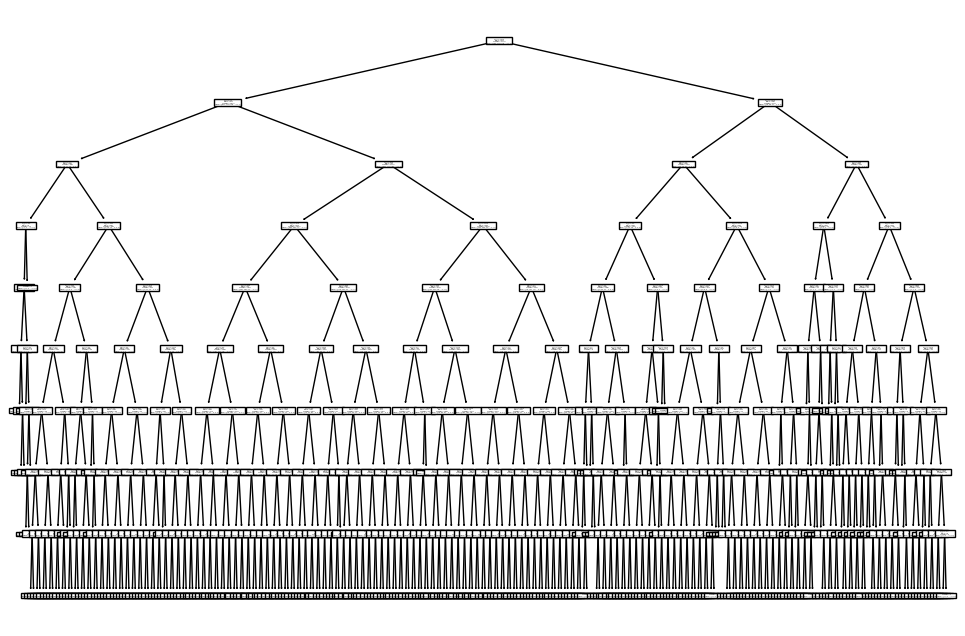

In [45]:

import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [46]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.2105037329443062


[Text(0.5, 0.875, 'x[2] <= 163.5\ngini = 0.946\nsamples = 27188\nvalue = [5785, 1192, 909 ... 1, 1, 1]'),
 Text(0.25, 0.625, 'x[1] <= 1.5\ngini = 0.942\nsamples = 25029\nvalue = [5577, 1134, 865 ... 0, 1, 1]'),
 Text(0.125, 0.375, 'x[2] <= 7.0\ngini = 0.983\nsamples = 696\nvalue = [75, 17, 13 ... 0, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.6\nsamples = 10\nvalue = [6, 1, 0 ... 0, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.984\nsamples = 686\nvalue = [69, 16, 13 ... 0, 0, 0]'),
 Text(0.375, 0.375, 'x[2] <= 83.5\ngini = 0.94\nsamples = 24333\nvalue = [5502, 1117, 852 ... 0, 1, 1]'),
 Text(0.3125, 0.125, 'gini = 0.948\nsamples = 13649\nvalue = [2859, 589, 433 ... 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.928\nsamples = 10684\nvalue = [2643, 528, 419 ... 0, 1, 1]'),
 Text(0.75, 0.625, 'x[2] <= 164.5\ngini = 0.984\nsamples = 2159\nvalue = [208, 58, 44 ... 1, 0, 0]'),
 Text(0.625, 0.375, 'x[5] <= 2.5\ngini = 0.987\nsamples = 1936\nvalue = [159, 48, 33 ... 1, 0, 0]'),
 Text(0.5625, 0.125, 'gini 

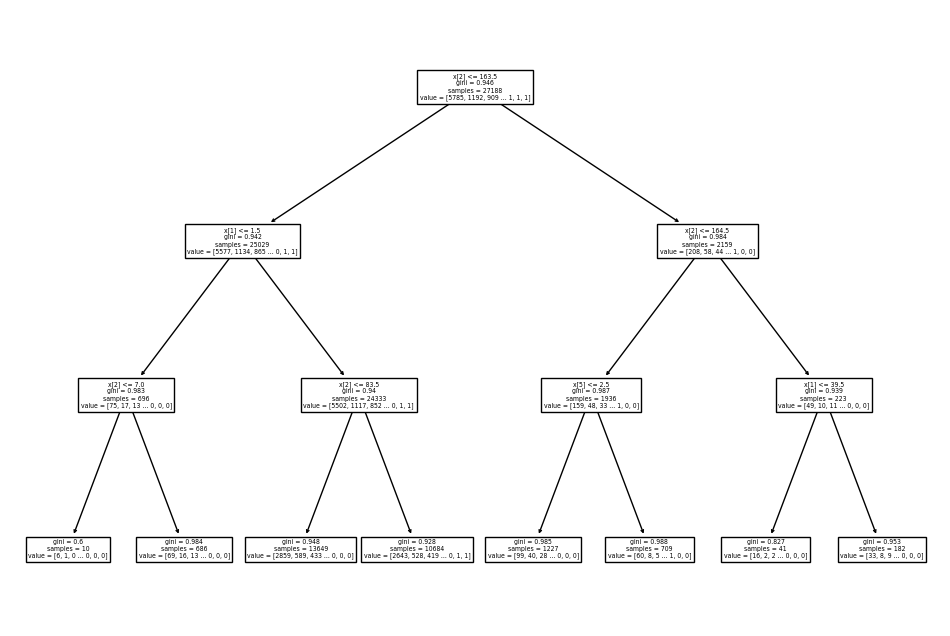

In [47]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini) 

In [48]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      1.00      0.35      2453
           1       0.00      0.00      0.00       522
           2       0.00      0.00      0.00       395
           3       0.00      0.00      0.00       372
           4       0.00      0.00      0.00       302
           5       0.00      0.00      0.00       288
           6       0.00      0.00      0.00       228
           7       0.00      0.00      0.00       191
           8       0.00      0.00      0.00       209
           9       0.00      0.00      0.00       189
          10       0.00      0.00      0.00       171
          11       0.00      0.00      0.00       129
          12       0.00      0.00      0.00       137
          13       0.00      0.00      0.00       135
          14       0.00      0.00      0.00       125
          15       0.00      0.00      0.00       115
          16       0.00      0.00      0.00        98
          17       0.00    

In [49]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[2453    0    0 ...    0    0    0]
 [ 522    0    0 ...    0    0    0]
 [ 395    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


In [50]:
df.isnull().sum()

Year                  0
Country of origin     0
Country of asylum     0
Authority             0
Application type      0
Stage of procedure    0
Cases / Persons       0
applied               0
dtype: int64

In [51]:
df["Stage of procedure"].unique()

array([0, 2, 3, 5, 6, 1, 4, 8, 7])

<p>I am going to look at the stage of procedure which basically means the application status</p> 

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

Year  Country of origin  Country of asylum  Authority  \
4737      5                 26                149          0   
11501     0                174                 58          0   
26086     5                 22                149          0   
19047     3                163                 63          0   
1372      1                200                 28          0   

       Application type  Stage of procedure  Cases / Persons  
4737                  0                   0                1  
11501                 2                   3                1  
26086                 2                   3                1  
19047                 2                   3                1  
1372                  0                   0                1

In [53]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(df)
# Optionally, reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [54]:
#setting up the parameter grid for the tuning purposes
param_grid={
    'n_clusters':[2,3,4,5,6,7,8],
    'init':['k-means++','random'],
    'n_init':[10,20],
    'max_iter':[100,300]
}

In [55]:
#Inialising the KMeans
kmeans= KMeans(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_scaled)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)
print("Best Accuracy:",grid_search)


Best hyperparameters found by GridSearchCV: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8, 'n_init': 10}
Best Accuracy: GridSearchCV(cv=3, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 300],
                         'n_clusters': [2, 3, 4, 5, 6, 7, 8],
                         'n_init': [10, 20]})


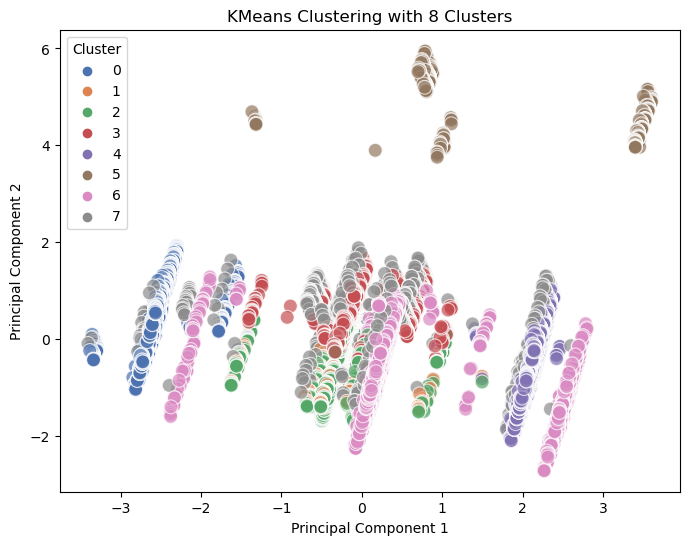

In [56]:
# Apply the best KMeans model with optimal hyperparameters
best_kmeans = grid_search.best_estimator_

# Fit the model
best_kmeans.fit(X_scaled)

# Predict the cluster labels
labels = best_kmeans.predict(X_scaled)

# Visualization: Plot the first two principal components and color by cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="deep", s=100, alpha=0.7)
plt.title(f"KMeans Clustering with {best_params['n_clusters']} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.show()

In [57]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.232


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state = 42)

In [60]:
#Hyperparameter Tuning along with GridSearchCV
#We need to define the parameter grid for k values and the distance metrics
param_grid={
    'n_neighbors': range(1,11), # This is to test k from 1 to 10
    'metric':['euclidean','manhattan','minkowski']
    
}

In [61]:
#We are using GridSearchCV in order to find the best hyperoarameters
knn= KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 11)},
             scoring='accuracy')

In [62]:
#Getting the best model
best_knn=grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}


In [63]:
#Training and evaluating the KNN model wit the hyperparameters optimized
y_pred=best_knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.17441112112240958
              precision    recall  f1-score   support

           0       0.25      0.80      0.38      1635
           1       0.03      0.04      0.03       325
           2       0.01      0.02      0.01       248
           3       0.04      0.05      0.05       240
           4       0.02      0.01      0.02       223
           5       0.02      0.02      0.02       204
           6       0.02      0.01      0.01       174
           7       0.00      0.00      0.00       138
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00       112
          10       0.00      0.00      0.00       124
          11       0.00      0.00      0.00        89
          12       0.02      0.01      0.01        87
          13       0.00      0.00      0.00        84
          14       0.00      0.00      0.00        84
          15       0.00      0.00      0.00        82
          16       0.03      0.01      0.02        

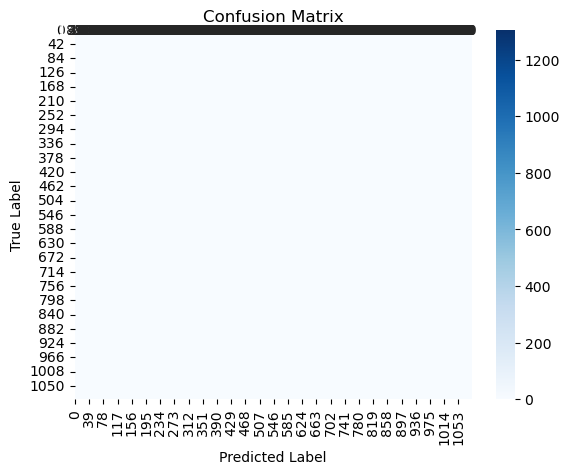

In [64]:
#Confusion Matrix to gain better insight
confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
#Visualize the data structures and reduce the dimensions with PCA for visualising
pca=PCA(n_components=2)
X_train_2D=pca.fit_transform(X_train)
X_test_2D=pca.transform(X_test)

In [66]:
# Plot training data clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_2D[:, 0], y=X_train_2D[:, 1], hue=y_train, palette="viridis", style=y_train)
plt.title("Training Data Clusters (High vs Low Applications)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

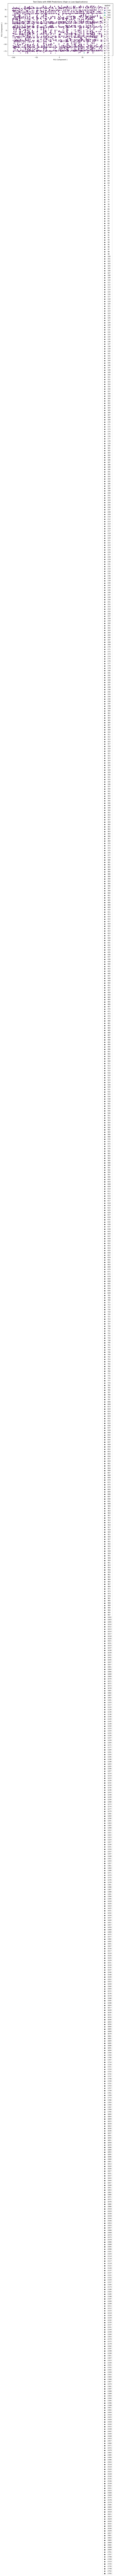

In [67]:
#Plot test data and predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test_2D[:, 0], y=X_test_2D[:, 1], hue=y_pred, palette="viridis", style=y_test)
plt.title("Test Data with KNN Predictions (High vs Low Applications)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()